In [1]:
#importing libraries

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Define paths for train, test, and validation datasets
train_dir = "D:\\SKAY\\Projects\\KEEP\\VScode\\Pneumonia\\Chest X_rays\\chest_xray\\train"
test_dir = "D:\\SKAY\Projects\\KEEP\\VScode\\Pneumonia\\Chest X_rays\\chest_xray\\test"
val_dir = "D:\\SKAY\\Projects\\KEEP\\VScode\\Pneumonia\\Chest X_rays\\chest_xray\\val"

In [3]:
# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32


In [4]:
# Create data generators for train, test, and validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Create data generators for train, test, and validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [6]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
163/163 [==============================] - 318s 2s/step - loss: 0.2447 - accuracy: 0.9013 - val_loss: 0.5230 - val_accuracy: 0.7500
Epoch 2/10
163/163 [==============================] - 265s 2s/step - loss: 0.1106 - accuracy: 0.9601 - val_loss: 0.1272 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 278s 2s/step - loss: 0.0702 - accuracy: 0.9772 - val_loss: 0.4348 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 293s 2s/step - loss: 0.0723 - accuracy: 0.9743 - val_loss: 0.0652 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 280s 2s/step - loss: 0.0543 - accuracy: 0.9808 - val_loss: 0.3627 - val_accuracy: 0.8125
Epoch 6/10
163/163 [==============================] - 269s 2s/step - loss: 0.0435 - accuracy: 0.9845 - val_loss: 0.4780 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 300s 2s/step - loss: 0.0343 - accuracy: 0.9868 - val_loss: 0.1844 - val_accuracy: 0.9375

In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

20/20 [==============================] - 22s 1s/step - loss: 2.6312 - accuracy: 0.7468
Test accuracy: 0.7467948794364929


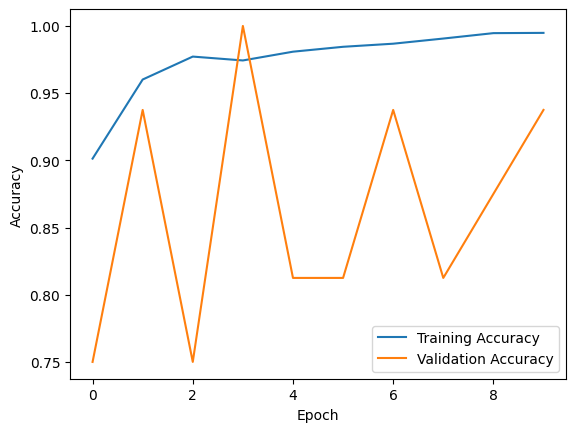

In [10]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()